# Leeson2: Example with TensorFlow

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\WL\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Data

In [2]:
observations = 10000

xs = np.random.uniform(-10, 10, (observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations, 1))
generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('tf_intro', inputs = generated_inputs, targets = generated_targets)

### Solving with TensorFlow

In [3]:
input_size = 2
output_size = 1

### Model

In [4]:
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])

weights = tf.Variable(tf.random_uniform([input_size, output_size], minval = -0.1, maxval = 0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval = -0.1, maxval = 0.1))

outputs = tf.matmul(inputs, weights) + biases

### Objective function and optimization method

In [5]:
#mean_loss = tf.losses.mean_squared_error(labels = targets, predictions = outputs) / 2.
mean_loss = tf.losses.huber_loss(labels = targets, predictions = outputs) / 2.

optimize = tf.train.GradientDescentOptimizer(learning_rate = 0.05).minimize(mean_loss)

### Preparation

In [6]:
sess = tf.InteractiveSession()

### Variables

In [7]:
initializer = tf.global_variables_initializer()

sess.run(initializer)

### Training data

In [8]:
training_data = np.load('tf_intro.npz')

### Learning

In [9]:
for i in range(100):
    
    _, curr_loss = sess.run([optimize, mean_loss], 
        feed_dict = {inputs: training_data['inputs'], targets: training_data['targets']})

    
    print(curr_loss)

8.4221
8.146848
7.8728986
7.6004233
7.329542
7.060367
6.793107
6.527961
6.265142
6.0049105
5.747633
5.4936757
5.2433724
4.9971094
4.755394
4.5187173
4.2875414
4.062391
3.8441305
3.633441
3.4312608
3.2387354
3.0569034
2.8871741
2.7316663
2.5927157
2.4719875
2.370077
2.2873676
2.2223337
2.1720712
2.1333363
2.103185
2.0790477
2.0588582
2.041221
2.0252347
2.0103273
1.9961324
1.9824222
1.9690367
1.9558793
1.9428833
1.9300075
1.9172176
1.9044932
1.8918173
1.8791804
1.8665732
1.8539902
1.8414282
1.8288788
1.8163451
1.8038223
1.7913078
1.7788013
1.7663023
1.7538098
1.7413214
1.728839
1.7163609
1.7038867
1.6914163
1.6789511
1.6664896
1.6540308
1.6415768
1.6291274
1.6166822
1.6042422
1.5918072
1.5793773
1.5669527
1.554534
1.5421221
1.529716
1.5173178
1.5049266
1.4925424
1.480166
1.4677969
1.4554352
1.443081
1.4307344
1.4183952
1.4060628
1.3937377
1.3814192
1.3691069
1.3568006
1.3445008
1.3322057
1.3199164
1.3076321
1.2953521
1.283077
1.2708062
1.258539
1.246275
1.2340158


### Plotting

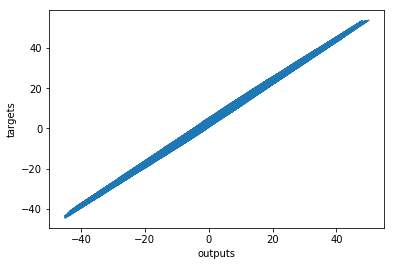

In [10]:
out = sess.run([outputs], feed_dict = {inputs: training_data['inputs']})
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

### Weight and biases

In [11]:
w = sess.run([weights], 
               feed_dict={inputs: training_data['inputs']})
               
b = sess.run([biases], 
               feed_dict={inputs: training_data['inputs']})

print (w)
print (b)

[array([[ 2.0090694],
       [-2.8187056]], dtype=float32)]
[array([2.0504026], dtype=float32)]
